<a href="https://colab.research.google.com/github/Bananac0d3/CRC_test/blob/main/Model_yachida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, Perceptron
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
!pip install scikit-bio
from skbio.stats.ordination import pcoa
import matplotlib.pyplot as plt
import seaborn as sns



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.6.2-cp310-cp310-linux_x86_64.whl size=3971912 sha256=0d9e462ab2512e36d6d87a31931860ac07a646e969c4a3d3d44cf9c1b1ed64aa
  Stored in directory: /root/.cache/pip/wheels/f3/9c/ed/c2b94011fd3765a19330df93f81265e178098dd86c047c1566
  Created wheel for biom-format: filename=biom_format-2.1.16-cp310-cp310-linux_x86_64.whl size=12158963 sha256=f3de58f11acdb9d1d417f522b028545a031fa09543a337e4be048b9637c6c362
  Stored in directory: /root/.cache/pip/wheels/8e/a9/f9/197fd5a0e5bbab5f2e03c89194f6c194bed7af5d7a8c8759f3
Successf

In [9]:
microbiome_data = pd.read_csv('/content/genera.counts.tsv',delimiter='\t')
print(microbiome_data.head())


   Age        BMI       Stage  \
0   57  26.880952  Stage_I_II   
1   65  26.562500     Healthy   
2   40  25.000000     Healthy   
3   67  20.173253     Healthy   
4   77  24.464602     Healthy   

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Firm-18;g__UBA1775  \
0                                                  0                                 
1                                                  0                                 
2                                                  0                                 
3                                                  0                                 
4                                                  0                                 

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A  \
0                                                 47                                                           
1                                                162        

In [ ]:
microbiome_data['Stage'] = microbiome_data['Stage'].apply(lambda x: 0 if x == 'Healthy' else 1)


In [17]:
data= microbiome_data
df = pd.DataFrame(data)
stage_mapping = {
    'Healthy': 0,
    'Stage_0': 1,
    'Stage_I_II': 2,
    'Stage_III_IV': 3,
    'HS': 4,
    'MP': 5
}
microbiome_data['Stage_Numeric'] = microbiome_data['Stage'].map(stage_mapping)
microbiome_numeric_data = microbiome_data.drop(columns=['Stage'], errors='ignore')

print(microbiome_numeric_data)

     Age        BMI  \
0     57  26.880952   
1     65  26.562500   
2     40  25.000000   
3     67  20.173253   
4     77  24.464602   
..   ...        ...   
341   75  21.170218   
342   58  19.605192   
343   73  20.545694   
344   51  28.384802   
345   65  27.180900   

     d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Firm-18;g__UBA1775  \
0                                                    0                                 
1                                                    0                                 
2                                                    0                                 
3                                                    0                                 
4                                                    0                                 
..                                                 ...                                 
341                                                  0                                 
342                

/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.7871689169744183 and the largest is 13.95052426385478.
  warn(
<ipython-input-18-cb77e63bf9c6>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.xlabel(f'PC1 ({pcoa_results.proportion_explained[0]*100:.2f}%)')
<ipython-input-18-cb77e63bf9c6>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, intege

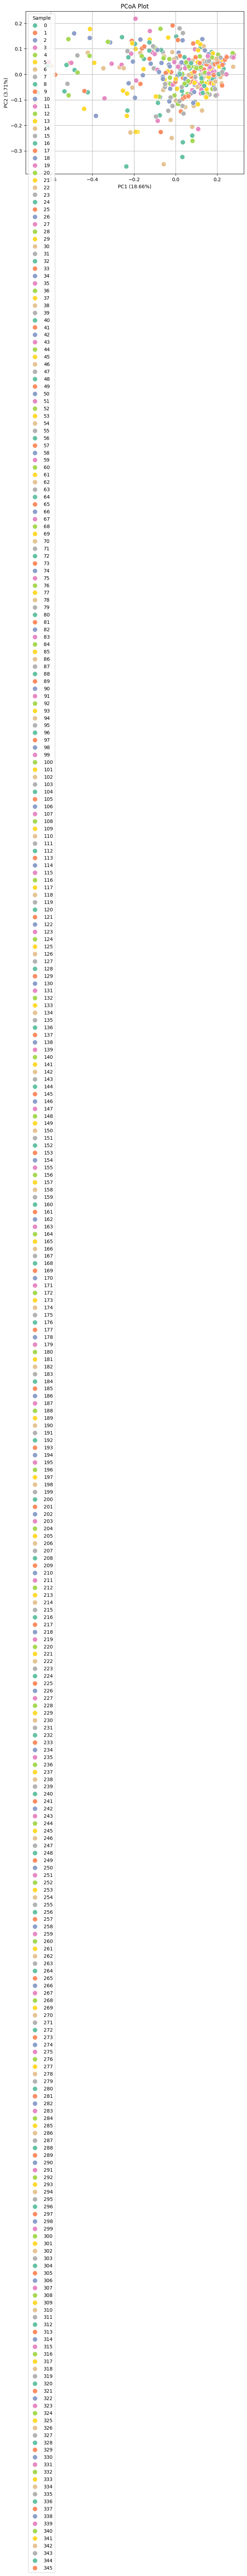

In [18]:
#sccale first or after
scaler = StandardScaler()
scaled_data = scaler.fit_transform(microbiome_numeric_data)
distance_matrix = pd.DataFrame(squareform(pdist(scaled_data, metric='braycurtis')))

# Perform PCoA
pcoa_results = pcoa(distance_matrix)

# Get the coordinates (the first two dimensions)
pc1 = pcoa_results.samples['PC1']
pc2 = pcoa_results.samples['PC2']

# Create a DataFrame
pcoa_df = pd.DataFrame({
    'PC1': pc1,
    'PC2': pc2,
    'Sample': distance_matrix.index  # Customize with your actual sample labels
})

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pcoa_df, x='PC1', y='PC2', hue='Sample', palette='Set2', s=100)
plt.title('PCoA Plot')
plt.xlabel(f'PC1 ({pcoa_results.proportion_explained[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pcoa_results.proportion_explained[1]*100:.2f}%)')
plt.grid(True)
plt.show()


In [19]:
!pip install rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ANCOMBC")


Streaming output truncated to the last 5000 lines.




































































































































































































































































































































































































































In [ ]:
X = microbiome_data.drop(columns=['Stage_numerical'])  # Drop non-feature columns
y = microbiome_data['Stage_numerical']  # Target variable

In [ ]:
print(microbiome_data.shape)

(346, 11943)


In [ ]:
microbiome_data['Stage'] = microbiome_data['Stage'].apply(lambda x: 0 if x == 'Healthy' else 1)

scaler = StandardScaler()
microbiome_data_scaled = scaler.fit_transform(microbiome_data)

In [ ]:
stage = microbiome_data['Stage'].values
print(stage)
full_data = pd.DataFrame(microbiome_data_scaled, columns=microbiome_data.columns)
full_data['Stage'] = stage
print(full_data.head())

[1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1
 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 0 1]
        Age       BMI  Stage  \
0 -0.605229  1.209710      1   
1  0.173968  1.109950      0   
2 -2.261022  0.620475      0   
3  0.368767 -0.891571      0   
4  1.342763  0.452754      0   

   d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Firm-18;g__UBA1775  \
0                 

In [ ]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    full_data.drop('Stage', axis=1),  # Features
    full_data['Stage'],  # Target
    test_size=0.2, random_state=42
)

In [ ]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)
print(model.coef_)

[[-0.03930294  0.00537683  0.00678516 ...  0.          0.
   0.0092086 ]]


In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5857


Confusion Matrix:
[[ 4 21]
 [ 8 37]]
AUC: 0.5396


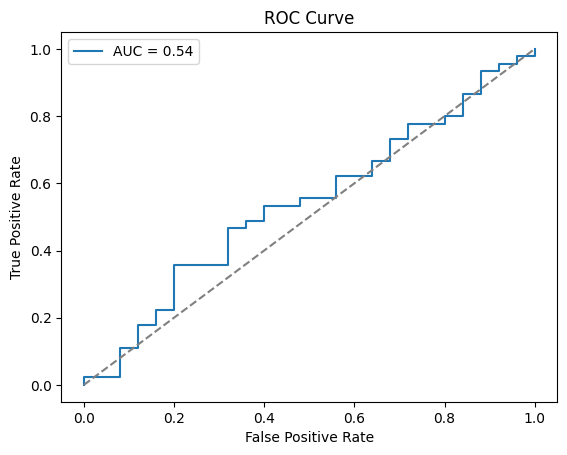

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# ROC Curve and AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc_score:.4f}')

# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( full_data.drop('Stage', axis=1),
    full_data['Stage'], test_size=0.2, random_state=42)
print(np.unique(y_train))


[0 1]


In [ ]:
#Check model agaisnt mutiple solvers
solvers = [
    ('SAG', LogisticRegression(penalty='l2', solver='sag', max_iter=1000, random_state=42)),
    ('SAGA', LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42)),
    ('lbfgs', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)),
    ('liblinear', LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)),
    ('SGD', SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)),
    ('Passive-Aggressive', PassiveAggressiveClassifier(max_iter=1000, random_state=42)),
    ('Perceptron', Perceptron(max_iter=1000, random_state=42))
]
results = []
for name, model in solvers:
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     accuracy = accuracy_score(y_test, y_pred)
if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_prob)
else:
        auc_score = np.nan

    results.append((name, accuracy, auc_score))

results_df = pd.DataFrame(results, columns=["Solver", "Accuracy", "AUC"])
print(results_df)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 22)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lasso_model = LogisticRegressionCV(
    Cs=10, penalty='l1', solver='lbfgs', max_iter=10000, cv=5, random_state=42
)

lasso_model.fit(X_train, y_train)
selected_features = np.where(lasso_model.coef_ != 0)[1]
print(f'Selected Features: {selected_features}')

In [ ]:
selected_feature_names = X_train.columns[selected_features]
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

print(f"Selected features: {selected_feature_names}")

Selected features: Index(['Age',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Peptostreptococcales;f__Acidaminobacteraceae;g__Fusibacter_A',
       'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Oceaniglobus',
       'd__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__CAG-448',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Alteromonadaceae;g__Idiomarina',
       'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__NS11-12g;f__UKL13-3;g__B1',
       'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Caulobacterales;f__Parvularculaceae;g__Parvularcula',
       'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__B39-G9;g__JAADFW01',
       'd__Bacteria;p__Cyanobacteria;c__Vampirovibrionia;o__Gastranaerophilales;f__Gastranaerophilaceae;g__Zag111',
       'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Gilliamel

In [ ]:
final_model = LogisticRegression(solver='L-BFGS', penalty='l1', max_iter=10000)
final_model.fit(X_train_selected, y_train)

LogisticRegression(max_iter=10000, penalty='l1', solver='saga')

Accuracy: 0.5714285714285714
Confusion Matrix:
[[ 3 22]
 [ 8 37]]
AUC: 0.5733


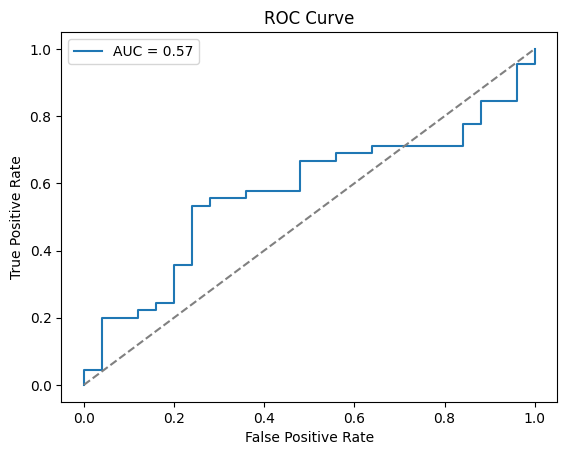

In [ ]:
y_pred = final_model.predict(X_test_selected)
y_prob = final_model.predict_proba(X_test_selected)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, final_model.predict_proba(X_test_selected)[:, 1])
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# ROC Curve and AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc_score:.4f}')

# Plot ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()